In [4]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

clr_palet = sns.color_palette()
plt.style.use("dark_background")



In [5]:
# Loading And Reading Dataset
df = pd.read_csv('PJME_hourly.csv')
df.head()


,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


# New Section

In [ ]:
# Checking the duplicate Records
df.duplicated().sum()

0

In [ ]:
# Checking the basic information of the dataset
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112347 entries, 0 to 112346
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  112347 non-null  object 
 1   PJME_MW   112347 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [ ]:
# Checking the shape of the dataset
df.shape



(145366, 2)

In [ ]:
# Checking the basic Statistics for numerical columns
df.describe().T



,count,mean,std,min,25%,50%,75%,max
PJME_MW,112347.0,32239.260541,6460.805856,312.0,27729.5,31642.0,35714.0,62009.0


In [ ]:
# Indexing Dataset
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)






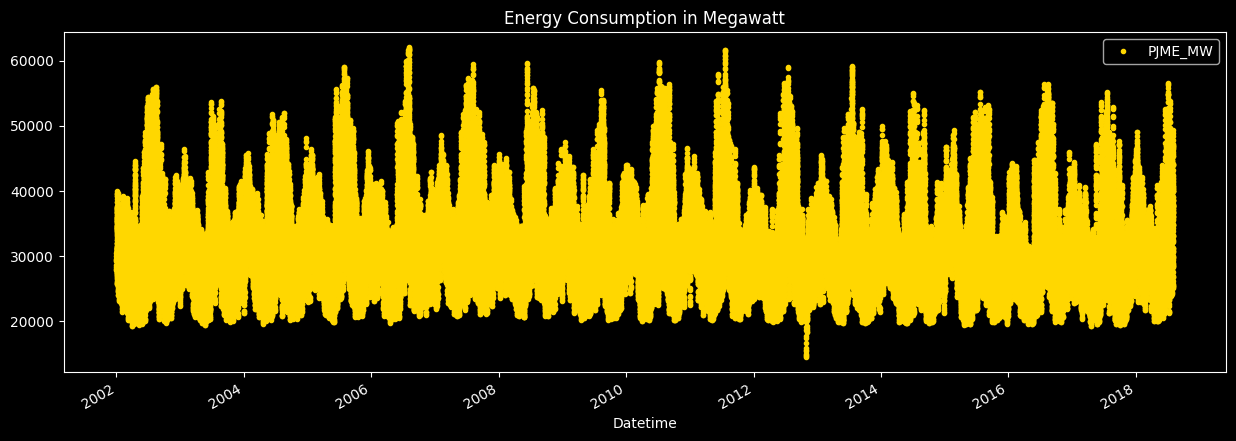

In [ ]:
# Analysis : Evolution Of Energy Use from 2002-2018
df.plot(style='.',
       figsize=(15, 5),
       color= "Gold",
       title='Energy Consumption in Megawatt')
plt.show()

In [ ]:
# Create Time Series Features
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_year'] = df.index.dayofyear
    df['day_of_month'] = df.index.day
    df['week_of_year'] = df.index.isocalendar().week
    return df
df1 = create_features(df)
df1.head()


,PJME_MW,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1


In [ ]:
df1.tail()

,PJME_MW,hour,day_of_week,quarter,month,year,day_of_year,day_of_month,week_of_year
Datetime,,,,,,,,,
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1
2018-01-01 23:00:00,40164.0,23,0,1,1,2018,1,1,1
2018-01-02 00:00:00,38608.0,0,1,1,1,2018,2,2,1


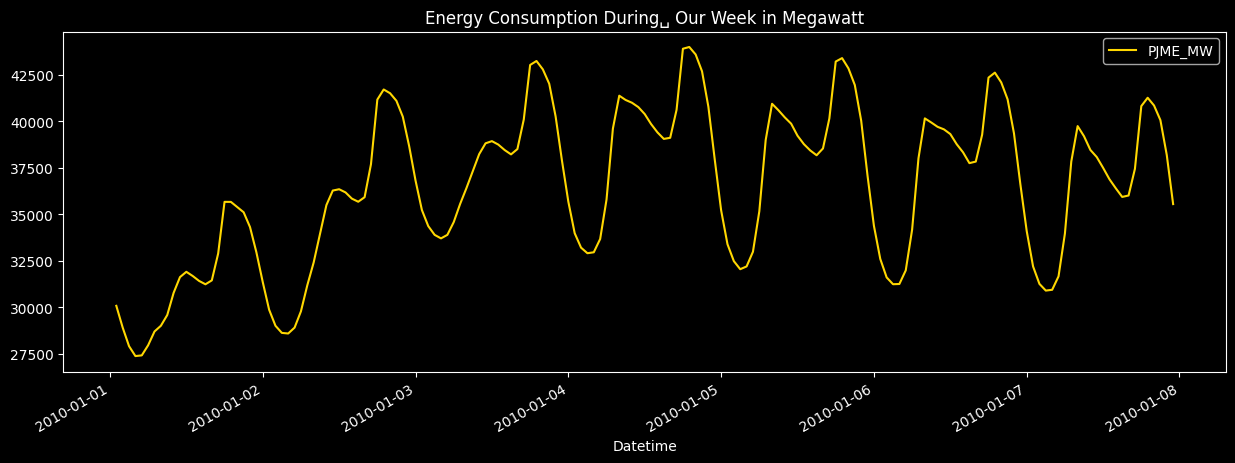

In [ ]:
# Analysis : Evolution Of the Time series during the Week 01-01-2010 /␣01-08-2010
En_Week = df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')]
En_Week.plot(figsize=(15, 5), color= "Gold", title='Energy Consumption During␣ Our Week in Megawatt')
plt.show()


In [ ]:
# Years With The Highest Energy Consumption in Megawatt
df_year = df1.groupby(['year']).sum()['PJME_MW']
df_year.sort_values( ascending=False).head()


year
2007    294386758.0
2005    291733172.0
2010    289866969.0
2008    289187689.0
2006    283840384.0
Name: PJME_MW, dtype: float64

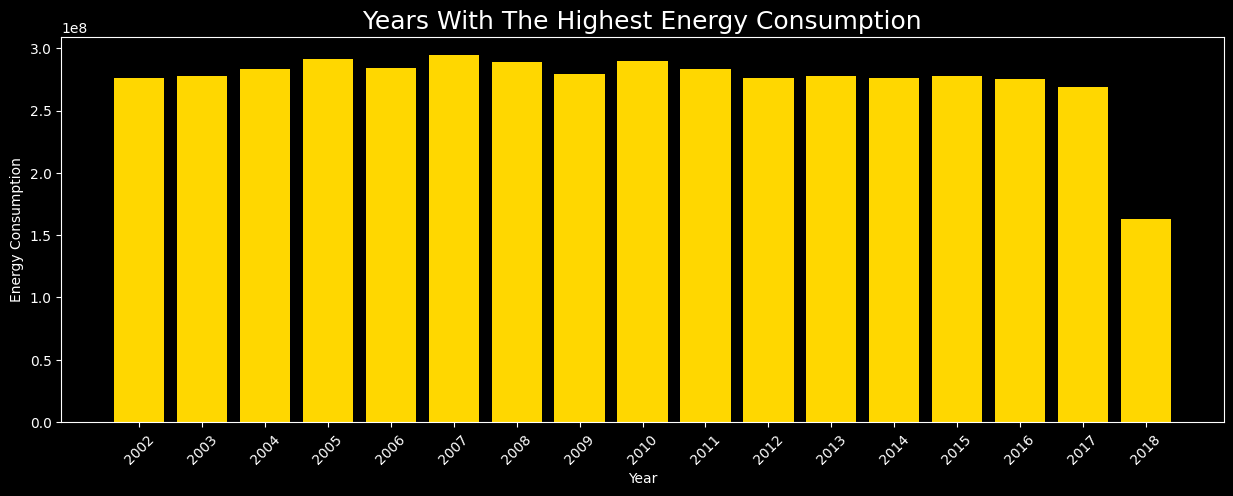

In [ ]:
# Years With The Highest Energy Consumption in Megawatt
Year_ = range(2002,2019)
plt.figure(figsize=(15, 5))
plt.bar(Year_,df_year,color= "Gold")
plt.xticks(Year_)
plt.ylabel('Energy Consumption')
plt.xlabel('Year')
plt.title(' Years With The Highest Energy Consumption ', fontsize=18)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Months With The Highest Energy Consumption in Megawatt
df_month = df1.groupby(['month']).sum()['PJME_MW']
df_month.sort_values( ascending=False).head()


month
7     479131193.0
8     437431506.0
1     434339038.0
6     413856422.0
12    388945376.0
Name: PJME_MW, dtype: float64

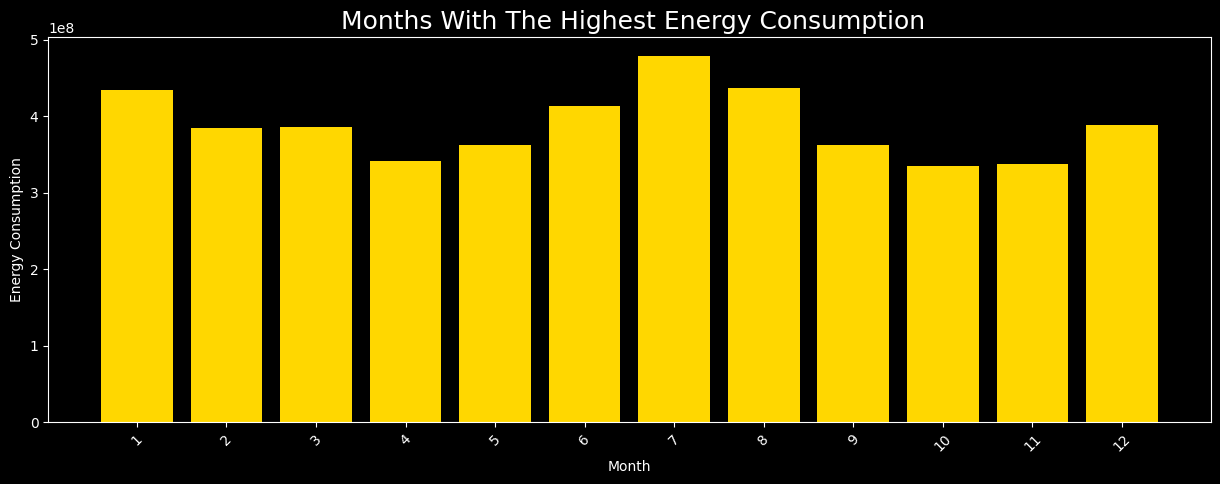

In [ ]:
# Months With The Highest Energy Consumption in Megawatt
month_ = range(1,13)
plt.figure(figsize=(15, 5))
plt.bar(month_,df_month, color= "Gold")
plt.xticks(month_)
plt.ylabel('Energy Consumption')
plt.xlabel('Month')
plt.title(' Months With The Highest Energy Consumption', fontsize=18)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Hours With The Highest Energy Consumption in Megawatt
df_hour = df1.groupby(['hour']).sum()['PJME_MW']
df_hour.sort_values( ascending=False).head()


hour
19    220672524.0
18    220644061.0
20    218735238.0
21    216519325.0
17    215640880.0
Name: PJME_MW, dtype: float64

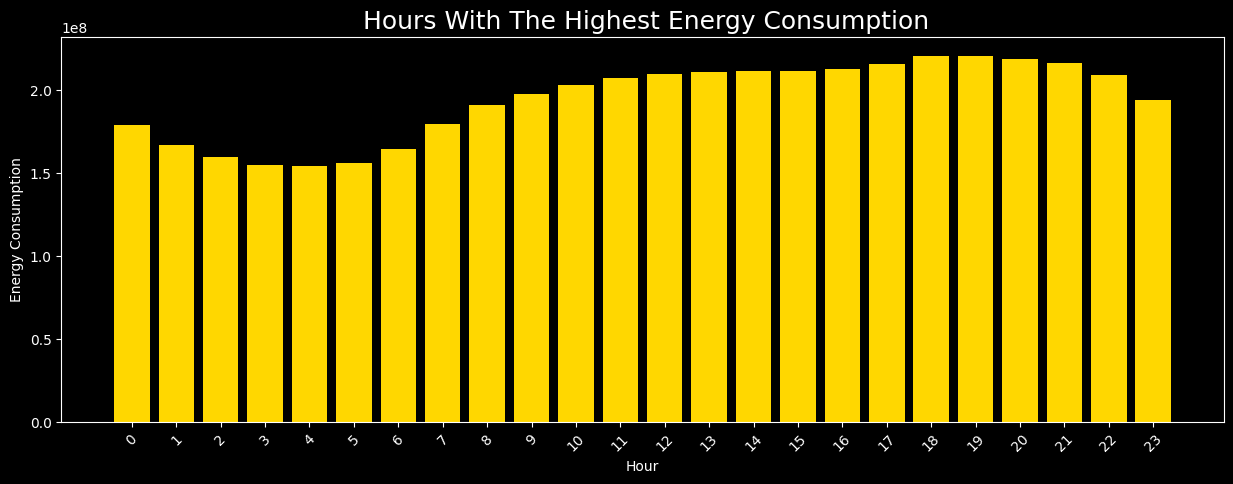

In [ ]:
# Hours With The Highest Energy Consumption in Megawatt
hour_ = range(0,24)
plt.figure(figsize=(15, 5))
plt.bar(hour_,df_hour, color='gold')
plt.xticks(hour_)
plt.ylabel('Energy Consumption')
plt.xlabel('Hour')
plt.title(' Hours With The Highest Energy Consumption', fontsize=18)
plt.xticks(rotation=45)
plt.show()


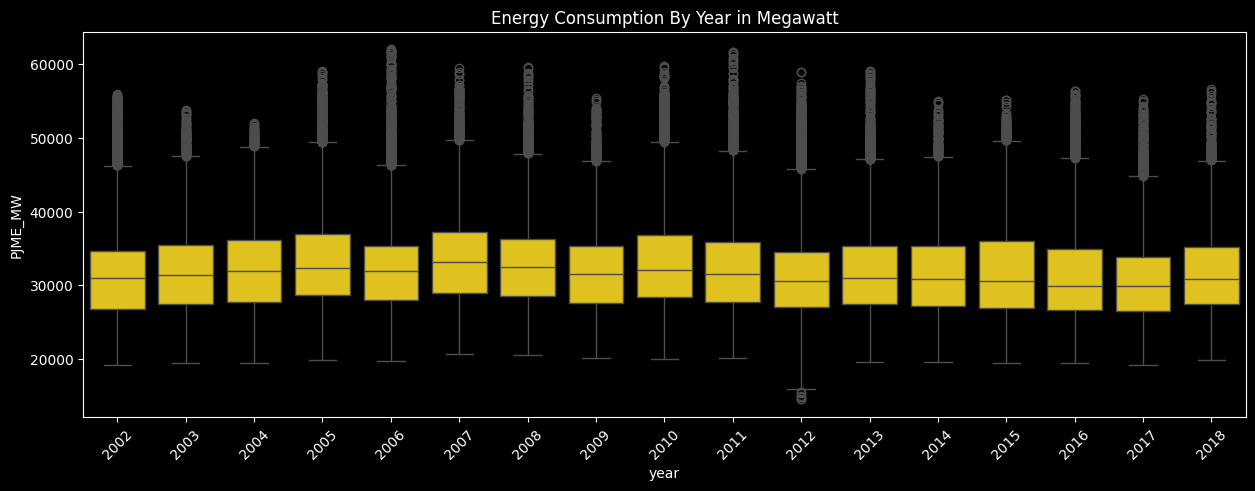

In [ ]:
# Analysis : Feature - Target Relationship
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x='year', y='PJME_MW', color ='gold')
ax.set_title('Energy Consumption By Year in Megawatt')
plt.xticks(rotation=45)
plt.show()


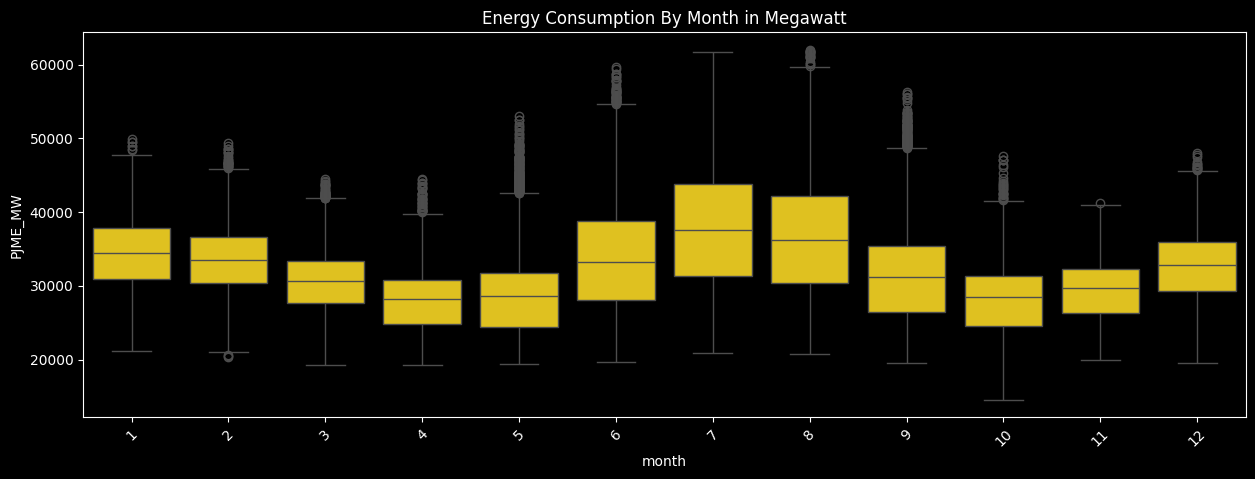

In [ ]:
# Analysis : Feature - Target Relationship
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x='month', y='PJME_MW' , color ='gold')
ax.set_title('Energy Consumption By Month in Megawatt')
plt.xticks(rotation=45)
plt.show()


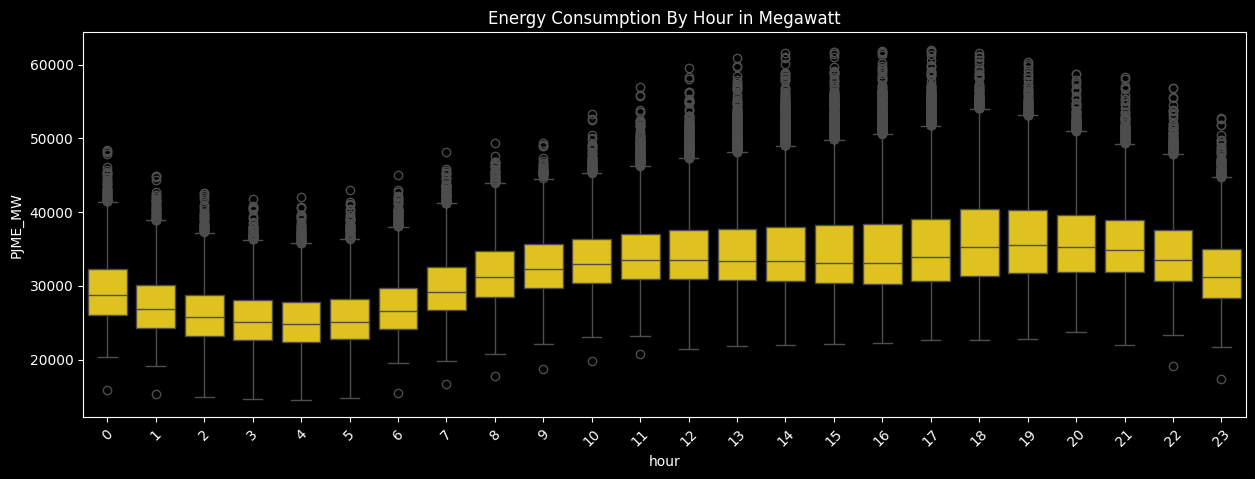

In [ ]:
# Analysis : Feature - Target Relationship
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df1, x='hour', y='PJME_MW', color ='gold')
ax.set_title('Energy Consumption By Hour in Megawatt')
plt.xticks(rotation=45)
plt.show()


In [ ]:
data = df1.drop(['quarter','day_of_year','week_of_year','day_of_month'],axis=1).corr()
data.head()

,PJME_MW,hour,day_of_week,month,year
PJME_MW,1.000000,0.486303,-0.183058,-0.044522,-0.058505
hour,0.486303,1.000000,0.000317,-0.000049,-0.000131
day_of_week,-0.183058,0.000317,1.000000,-0.000086,-0.000035
month,-0.044522,-0.000049,-0.000086,1.000000,-0.043370
year,-0.058505,-0.000131,-0.000035,-0.043370,1.000000


<Axes: >

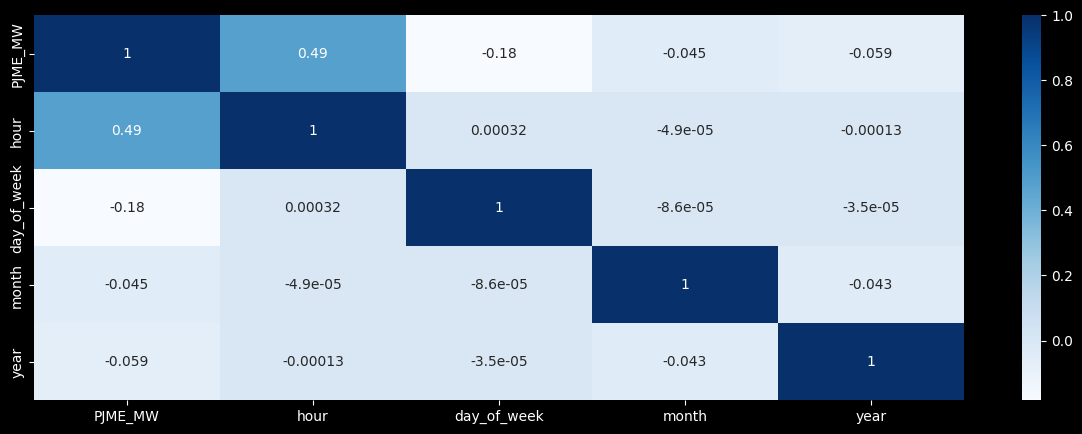

In [ ]:
# Correlation Analysis
plt.figure(figsize=(15, 5))
sns.heatmap(data=data, annot=True, cmap='Blues')

In [ ]:
# Train-Test split
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']


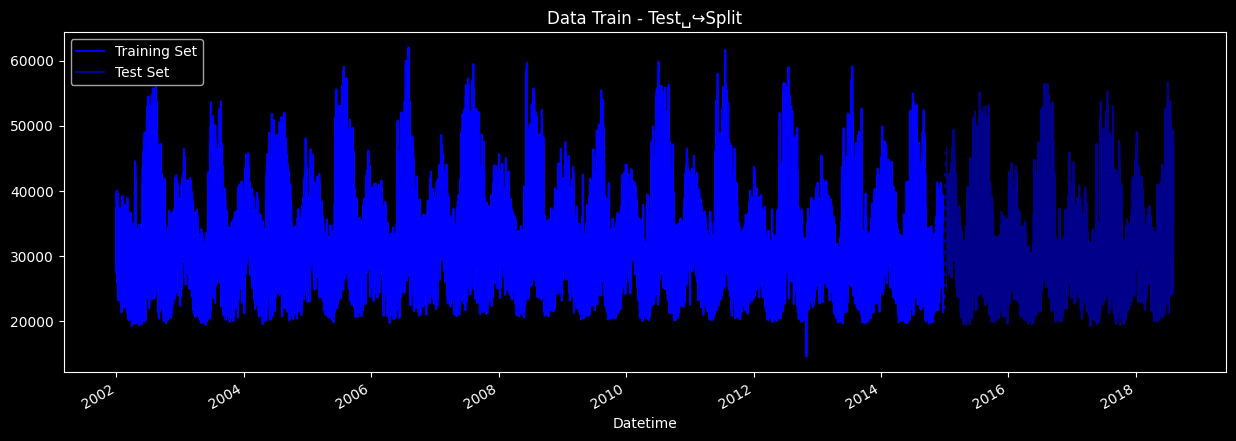

In [ ]:
# Analysis : Evolution Of Training Set and Test Set from 2002-2018
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', color= "blue",title='Data Train - Test␣↪Split')
test.plot(ax=ax, label='Test Set',color= "darkblue")
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()


In [ ]:
# Create XGBoost Model
train = create_features(train)
test = create_features(test)
FEATURES = ['day_of_year', 'hour', 'day_of_week', 'quarter', 'month', 'year']
TARGET = 'PJME_MW'
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]


In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                      n_estimators=1000,
                      early_stopping_rounds=50,
                      objective='reg:linear',
                      max_depth=3,
                      learning_rate=0.01)
reg.fit(X_train, y_train,
eval_set=[(X_train, y_train), (X_test, y_test)],
verbose=100)


[0]	validation_0-rmse:32605.13970	validation_1-rmse:31657.15729


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:24:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12584.35462	validation_1-rmse:11747.28803
[200]	validation_0-rmse:5837.33066	validation_1-rmse:5363.58554
[300]	validation_0-rmse:3923.28511	validation_1-rmse:4020.48045
[400]	validation_0-rmse:3447.54638	validation_1-rmse:3860.60088
[500]	validation_0-rmse:3288.19208	validation_1-rmse:3816.37862
[600]	validation_0-rmse:3206.55619	validation_1-rmse:3779.04119
[700]	validation_0-rmse:3153.61368	validation_1-rmse:3754.45684
[800]	validation_0-rmse:3114.34038	validation_1-rmse:3738.38209
[900]	validation_0-rmse:3084.39550	validation_1-rmse:3730.01893
[988]	validation_0-rmse:3060.25324	validation_1-rmse:3728.07396


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

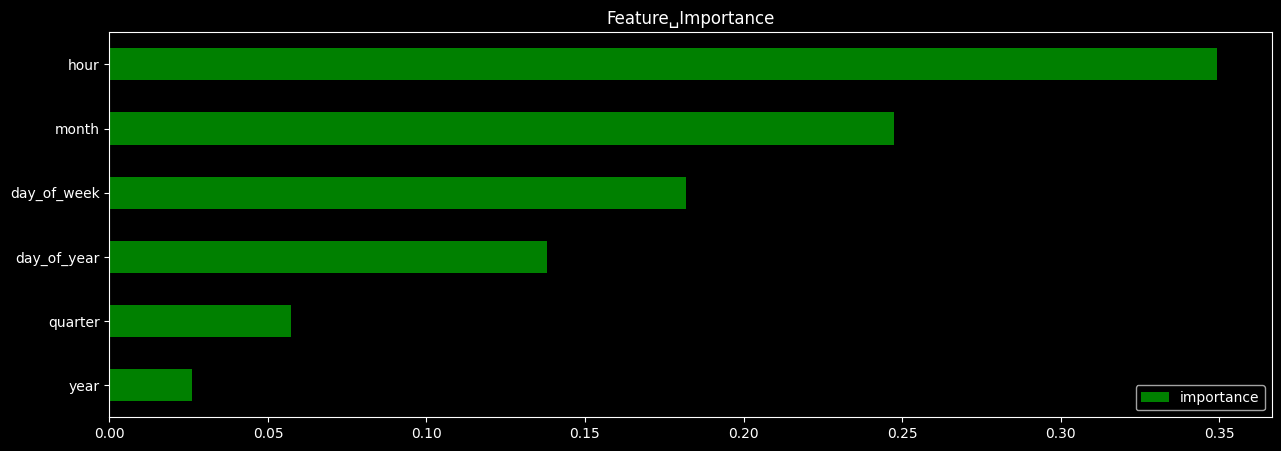

In [ ]:
# Analysis : Feature Importance
fi = pd.DataFrame(data=reg.feature_importances_,
index=reg.feature_names_in_,
columns=['importance'])
fi.sort_values('importance').plot(figsize=(15, 5), kind='barh', title='Feature␣Importance', color='green')
plt.show()


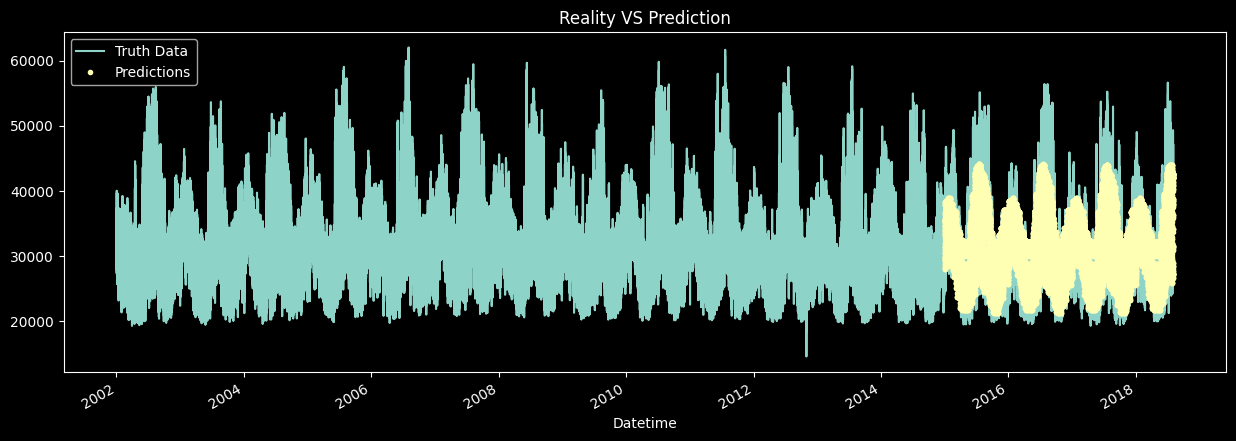

In [ ]:
# Cheaking Test Forecasting
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True,right_index=True)
ax = df[['PJME_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Reality VS Prediction')
plt.show()


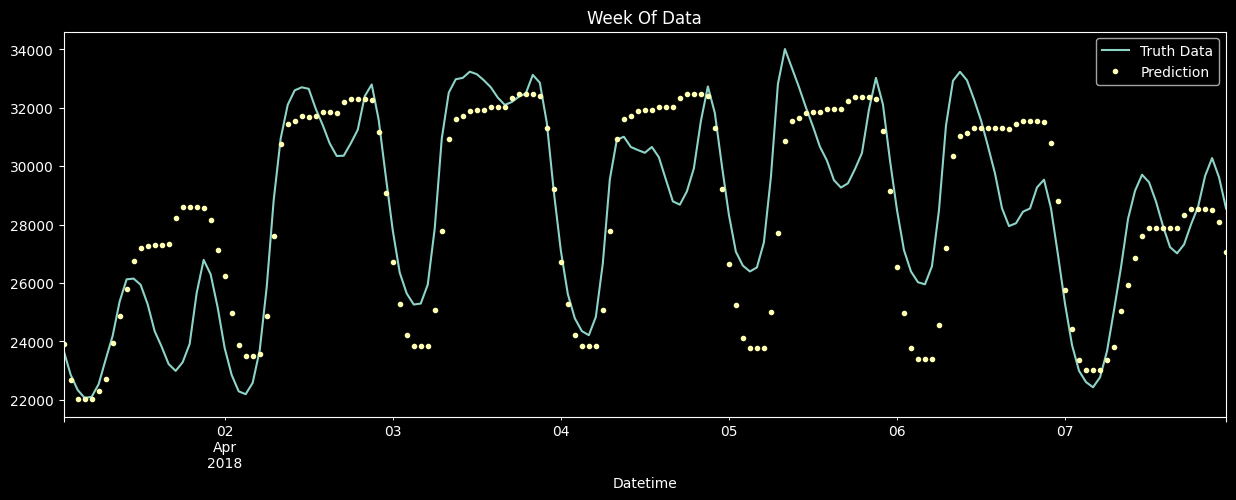

In [ ]:
# Look at one week (04-01-2018/04-08-2018 ) of predictions
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
.plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'] \
.plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()


In [ ]:
# Calculate Error
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# MSE
mean_squared_error(y_true=test['PJME_MW'] ,
                   y_pred=test['prediction'])



13889027.66092699

In [ ]:
# RMSE
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')


RMSE Score on Test set: 3726.80


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# MAE
mean_absolute_error(y_true=test['PJME_MW'] ,
                    y_pred=test['prediction'])

2902.2946984211

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
mean_absolute_percentage_error(y_true=test['PJME_MW'] ,
                   y_pred=test['prediction'])


9.162184535239117

In [ ]:
# Worst absolute predicted days
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)


date
2016-08-13    12879.484619
2016-08-14    12772.887207
2015-02-20    11186.031494
2016-09-09    10966.513102
2016-09-10    10889.102214
2018-01-06    10642.975830
2016-08-12    10041.172689
2015-02-21     9988.168783
2015-02-16     9900.809326
2018-01-07     9852.571370
Name: error, dtype: float64

In [ ]:
# Best predicted days
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)


date
2017-10-24    322.958008
2015-10-28    426.451335
2016-10-27    543.167155
2015-05-06    556.749674
2017-10-15    569.468262
2018-05-16    569.951009
2015-11-06    678.310140
2017-04-07    687.475911
2016-12-29    706.143392
2016-09-16    711.019694
Name: error, dtype: float64